## 1.Intensity Transformation

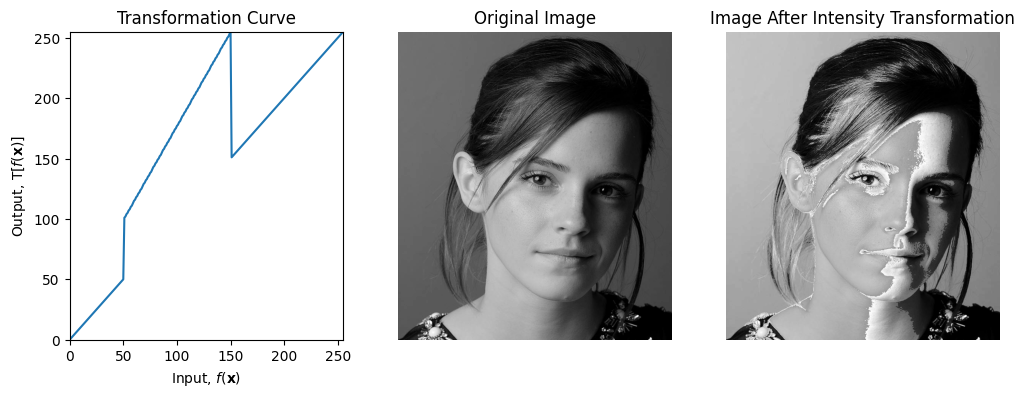

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, c[4, 1], c[4, 0] - c[3, 0]).astype('uint8')


transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(transform)
plt.title("Transformation Curve")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')

img_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

#region
plt.subplot(132)
plt.imshow(img_orig, cmap="gray")
plt.title('Original Image')
plt.axis('off')
#endregion

img_transformed = cv.LUT(img_orig, transform)

#region
plt.subplot(133)
plt.imshow(img_transformed, cmap="gray")
plt.title('Image After Intensity Transformation')
plt.axis('off')

plt.show()
#endregion

## 2. Intensity Transformation for a Brain Proton Density Image

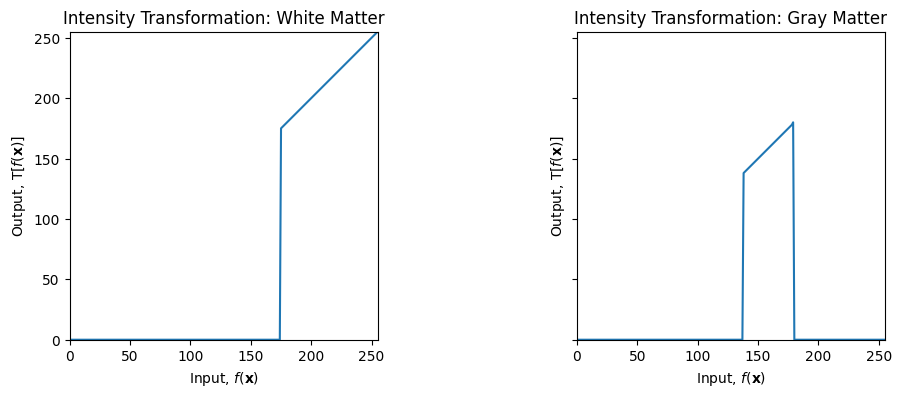

Text(0.5, 1.0, 'Intensity Transformation: Gray Matter')

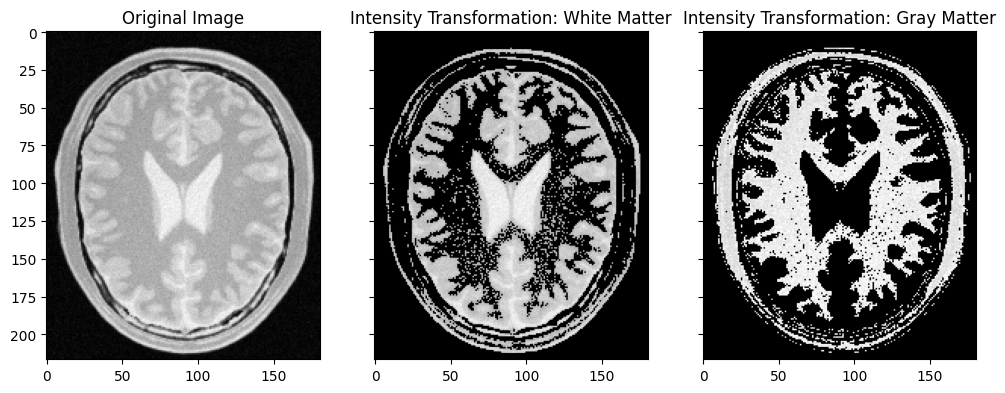

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_orig = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

white_threshold_upper = 255
white_threshold_lower = 175
white_matter = np.linspace(0, 255, 256, dtype='uint8')
white_matter[:white_threshold_lower] = 0
white_matter[white_threshold_lower:] = np.linspace(white_threshold_lower, white_threshold_upper, white_threshold_upper - white_threshold_lower + 1, dtype='uint8')

gray_threshold_upper = 180
gray_threshold_lower = 138
gray_matter = np.linspace(0, 255, 256, dtype='uint8')
gray_matter[:gray_threshold_lower] = 0
gray_matter[gray_threshold_upper:] = 0
gray_matter[gray_threshold_lower:gray_threshold_upper] = np.linspace(gray_threshold_lower, gray_threshold_upper, gray_threshold_upper - gray_threshold_lower, dtype='uint8')

white_transform = cv.LUT(img_orig, white_matter)
gray_transform = cv.LUT(img_orig, gray_matter)


fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,4))

ax[0].plot(white_matter)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_aspect('equal')
ax[0].set_title('Intensity Transformation: White Matter')


ax[1].plot(gray_matter)
ax[1].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[1].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[1].set_xlim(0, 255)
ax[1].set_ylim(0, 255)
ax[1].set_aspect('equal')
ax[1].set_title('Intensity Transformation: Gray Matter')

plt.show()

fig, ax = plt.subplots(1, 3, sharex='all', sharey='all', figsize=(12,6))

ax[0].imshow(img_orig, cmap="gray")
ax[0].set_title('Original Image')

ax[1].imshow(white_transform, cmap="gray")
ax[1].set_title('Intensity Transformation: White Matter')

ax[2].imshow(gray_transform, cmap="gray")
ax[2].set_title('Intensity Transformation: Gray Matter')

## 3.Apllying Gamma Correction

Text(0, 0.5, 'Frequency')

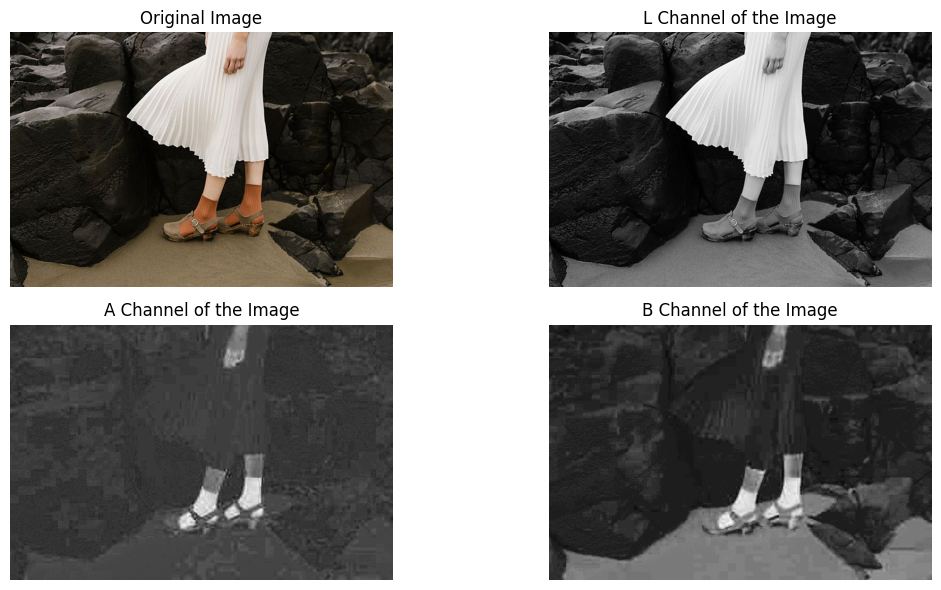

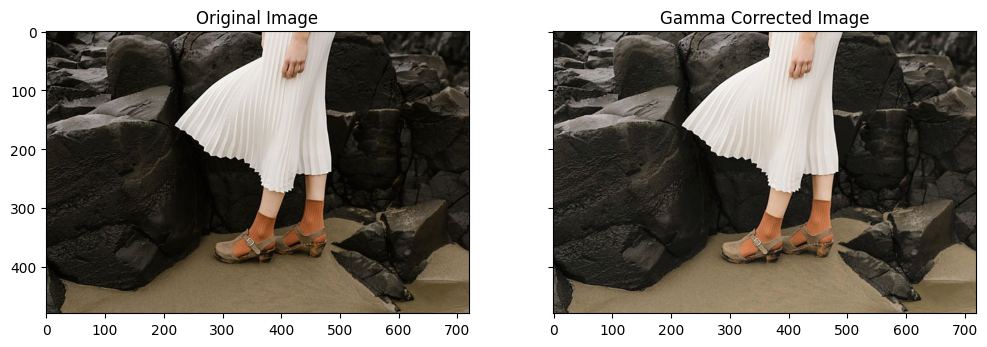

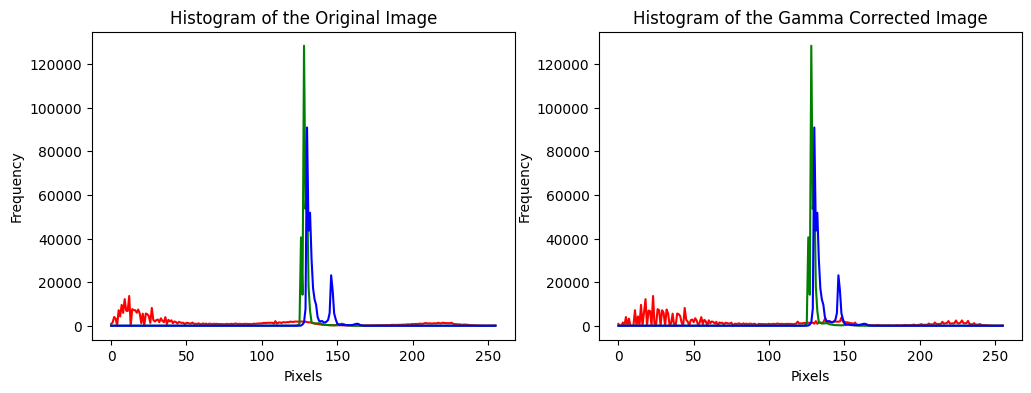

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

img_ceilab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)        # Convert the image into CEILAB color space  
l_channel, a_channel, b_channel = cv.split(img_ceilab)      # Split the converted image into three channels     

#region
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(l_channel, cmap="gray")
plt.title('L Channel of the Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap="gray")
plt.title('A Channel of the Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap="gray")
plt.title('B Channel of the Image')
plt.axis('off')

plt.tight_layout()
#endregion

gamma = 0.78
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
l_channel_gamma_corrected = cv.LUT(l_channel, table)        # Apply gamma correction only for L channel
img_gamma = cv.merge((l_channel_gamma_corrected, a_channel, b_channel))     # Merge L channel with other channels
img_corrected = cv.cvtColor(img_gamma, cv.COLOR_Lab2RGB)

#region
fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,6))
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')

ax[1].imshow(img_corrected)
ax[1].set_title('Gamma Corrected Image')
#endregion

f, ax = plt.subplots(1, 2, figsize=(12, 4))
space = ('l', 'a', 'b')
color = ('r', 'g', 'b')

for i, c in enumerate(space):
    hist_orig = cv.calcHist([img_ceilab], [i], None, [256], [0, 256])       # Calculate histogram for original image
    ax[0].plot(hist_orig, color=color[i])
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])       # Calculate histogram for gamma corrected image
    ax[1].plot(hist_gamma, color=color[i])

#region   
ax[0].set_title('Histogram of the Original Image')
ax[0].set_xlabel('Pixels')
ax[0].set_ylabel('Frequency')


ax[1].set_title('Histogram of the Gamma Corrected Image')
ax[1].set_xlabel('Pixels')
ax[1].set_ylabel('Frequency')

#endregion

## 4. Increasing the Vibrance of a Photograph by Intensity Transformation

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from ipywidgets import interactive

def vibrance(x, a, sigma=70):
    return int(min(x + (a*128)*np.exp((-(x-128)**2)/(2*(sigma**2))), 255))  # Transformation function

def transform(a):
    # This function will apply the desired transformation to selected planes of the image
    plt.clf()
    table = np.array([vibrance(x, a) for x in np.arange(0, 256)]).astype('uint8')
    s_channel_corrected = cv.LUT(s_channel, table)          # Apply vibrance correction to the saturation plane
    img_corrected = cv.merge((h_channel, s_channel_corrected, v_channel))   # Merge corrected plane with hue and value planes
    img_corrected_rgb = cv.cvtColor(img_corrected, cv.COLOR_HSV2RGB)
    #region
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(img_corrected_rgb)
    plt.title('Intensity Transformed Image')
    plt.axis('off')
    
    plt.show()
    
    a_value = np.arange(0, 256)
    plt.figure(figsize=(4,4))
    plt.plot(a_value,table, label=f'a = {a}')
    plt.title('Intensity Transformation Function')
    plt.xlabel('Input Intensity')
    plt.ylabel('Transformed Intensity')
    plt.legend()
    plt.grid()
    
    plt.show()
    #endregion

img_orig = cv.imread('a1images/spider.png', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)           # Convert the image into HSV color space
h_channel, s_channel, v_channel = cv.split(img_hsv)         # Split the image into hue, saturation and value planes

# Interactive Slider
final_plot = interactive(transform, a=(0, 1, 0.001))
output = final_plot.children[-1]
output.layout.height = '800px'
final_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, step=0.001), Output(layout=Layout(heigh…

## 5. Histogram Equalization

### Equalization Using In-built Equalizing Function

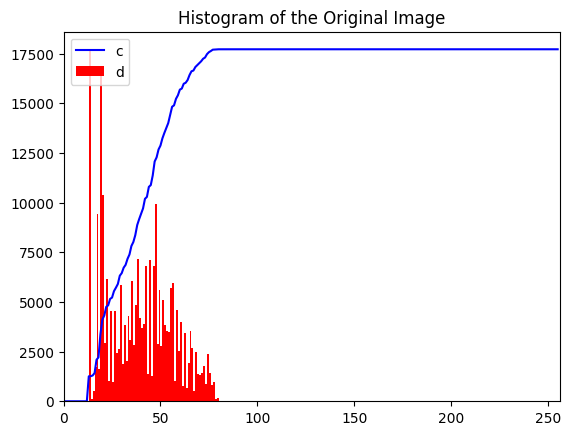

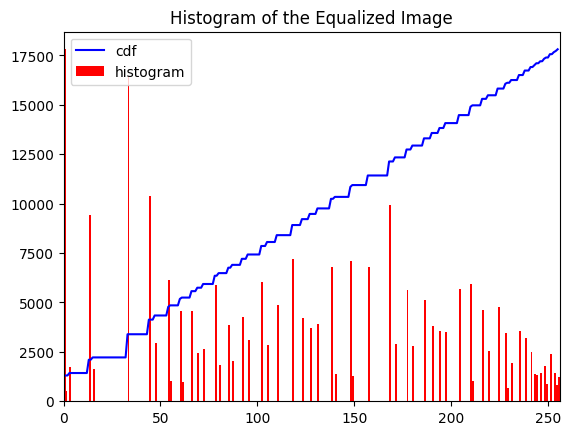

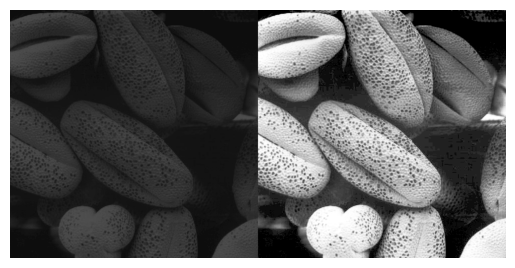

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)

hist,  bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf, histogram'), loc='upper left')
plt.title('Histogram of the Original Image')
plt.show()

equ = cv.equalizeHist(img)
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf*hist.max()/cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(equ.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

res = np.hstack((img, equ))
plt.axis('off')
plt.imshow(res, cmap='gray')

### Equalization Using Custom Equalizing Function

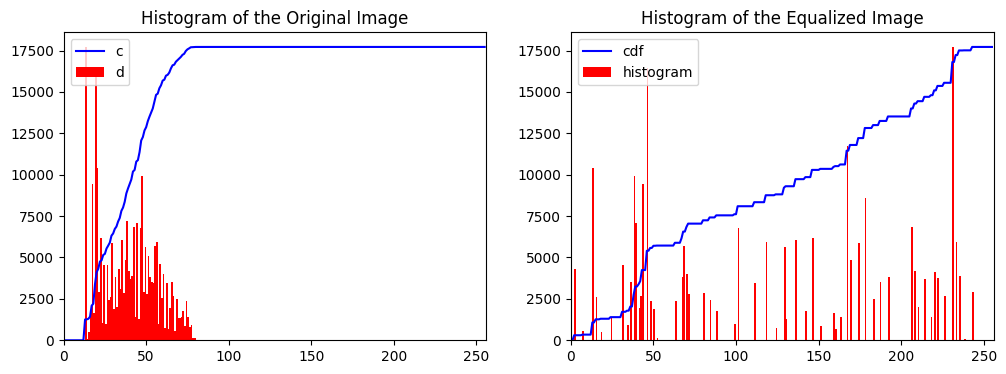

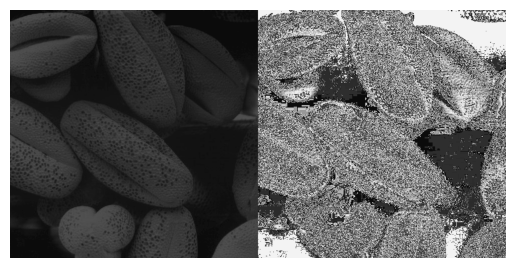

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def equalize(image):
    histogram,  bins = np.histogram(img.flatten(), bins=256, range=(0, 256))    # Calculate the histogram of the image
    cdf = hist.cumsum()                                                         # calculate cumulative dixtribution function
    cdf_normalized = cdf * histogram.max()/cdf.max()                            # Normalize the CDF to map the range into (0-255) range
    table = np.interp(image.flatten(), bins[:-1], cdf_normalized)               # Store the mapped values into a table                 
    equalized_image = table.reshape(image.shape)                                # Reshape the table into the shape of the original image
    return equalized_image.astype('uint8')
    

img = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)

hist,  bins = np.histogram(img.ravel(), 256, [0, 256])      # Calculate the histogram of the original image
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()
#region
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf, histogram'), loc='upper left')
plt.title('Histogram of the Original Image')
#endregion

equ = equalize(img)
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])       # Calculate the histogram of the equalized image
cdf = hist.cumsum()
cdf_normalized = cdf*hist.max()/cdf.max()
#region
plt.subplot(122)
plt.plot(cdf_normalized, color='b')
plt.hist(equ.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Histogram of the Equalized Image')
plt.show()
#endregion

conversion = np.hstack((img, equ))
plt.axis('off')
plt.imshow(conversion, cmap='gray')

## 6. Histogram Equalization to Make Histogram Equalized Foreground

### a) Open and split the image into hue, saturation and value planes

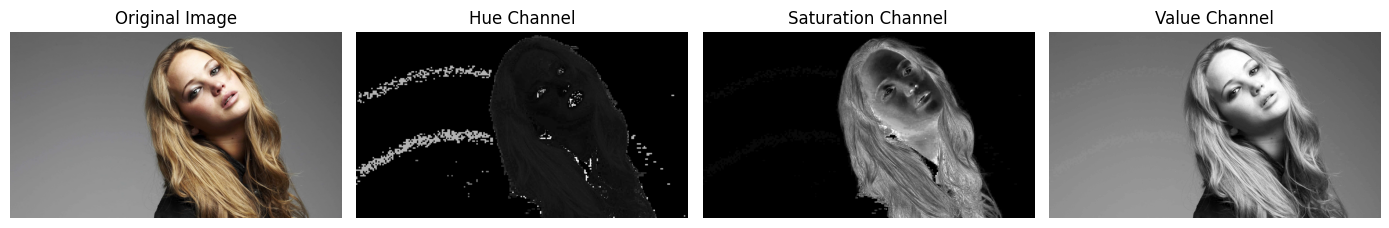

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_orig = cv.imread('a1images/jeniffer.jpg', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)       # Convert the image into HSV color space
h_channel, s_channel, v_channel = cv.split(img_hsv)     # Split the converted image into hue, saturation and value planes

#region
plt.figure(figsize=(14, 6))

plt.subplot(141)
plt.imshow(img_rgb, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Displaying each separate plane in gray scale
plt.subplot(142)
plt.imshow(h_channel, cmap='gray')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(143)
plt.imshow(s_channel, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(144)
plt.imshow(v_channel, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()
#endregion

### b) Select the suitable plane to apply threshold to extract the foreground mask

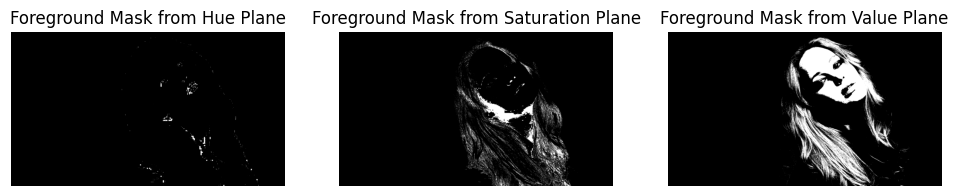

In [19]:
# Select a threshold value randomly
threshold = 160

# Apply thresholding on three channels seperately
ret1, foreground_mask1 = cv.threshold(h_channel, threshold, 255, cv.THRESH_BINARY)
ret2, foreground_mask2 = cv.threshold(s_channel, threshold, 255, cv.THRESH_BINARY)
ret3, foreground_mask3 = cv.threshold(v_channel, threshold, 255, cv.THRESH_BINARY)

#region
plt.figure(figsize=(12,6))

plt.subplot(131)
plt.imshow(foreground_mask1, cmap='gray')
plt.title('Foreground Mask from Hue Plane')
plt.axis('off')

plt.subplot(132)
plt.imshow(foreground_mask2, cmap='gray')
plt.title('Foreground Mask from Saturation Plane')
plt.axis('off')

plt.subplot(133)
plt.imshow(foreground_mask3, cmap='gray')
plt.title('Foreground Mask from Value Plane')
plt.axis('off')

plt.show()
#endregion


### c) Obtain the forground only using cv.bitwise_and and compute the histogram

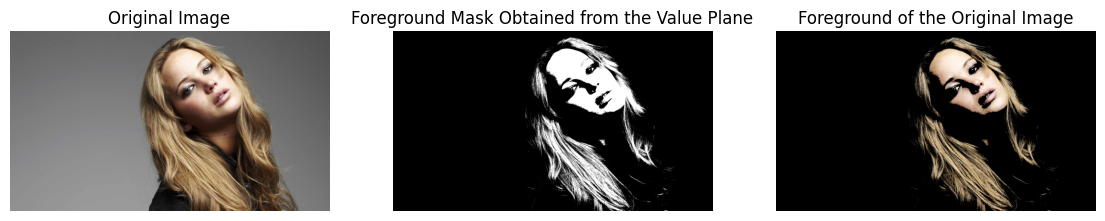

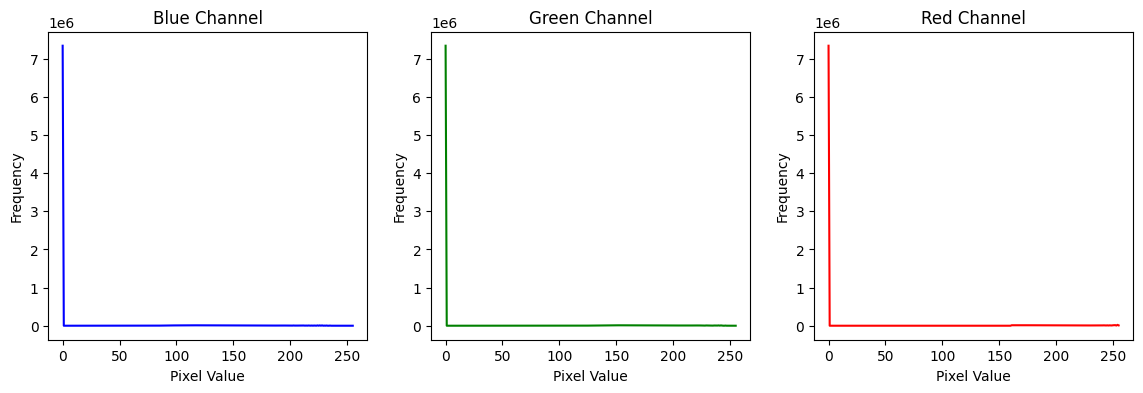

In [20]:
# Obtain the foreground using the mask from the value channel
foreground_img = cv.bitwise_and(img_orig, img_orig, mask=foreground_mask3)

#region
plt.figure(figsize=(14, 6))

plt.subplot(131)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(foreground_mask3, cmap='gray')
plt.title('Foreground Mask Obtained from the Value Plane')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
plt.title('Foreground of the Original Image')
plt.axis('off')

plt.show()
#endregion

# Calculate histograms for foreground of each channel in BGR color space
b_hist = cv.calcHist([foreground_img], [0], None, [256], [0, 256])
g_hist = cv.calcHist([foreground_img], [1], None, [256], [0, 256])
r_hist = cv.calcHist([foreground_img], [2], None, [256], [0, 256])

#region
plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.plot(b_hist, color='blue')
plt.title('Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.plot(g_hist, color='green')
plt.title('Green Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.plot(r_hist, color='red')
plt.title('Red Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()
#endregion

### d) Obtain the cumulative sum of the histogram

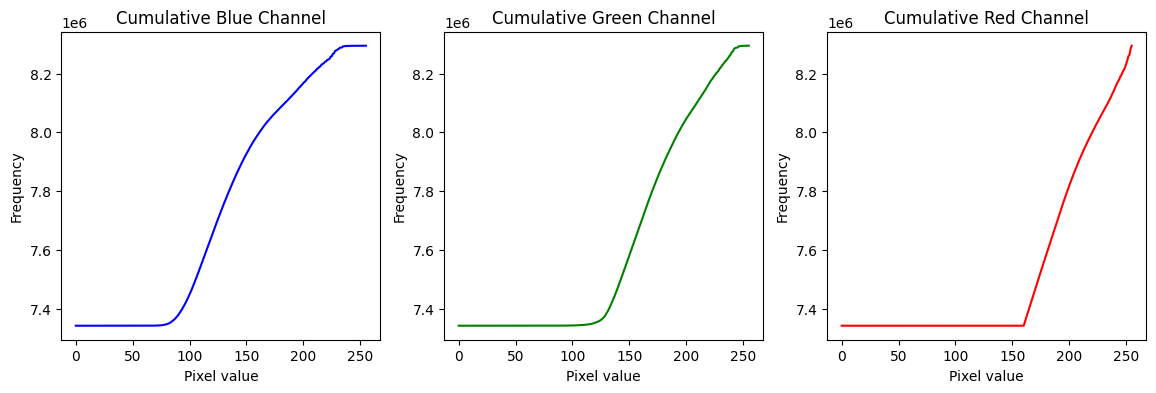

In [21]:
# Obtain the culmulative sum of the histogram
cumulative_hist_b = np.cumsum(b_hist)
cumulative_hist_g = np.cumsum(g_hist)
cumulative_hist_r = np.cumsum(r_hist)

#region
plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.plot(cumulative_hist_b, color='blue')
plt.title('Cumulative Blue Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.plot(cumulative_hist_g, color='green')
plt.title('Cumulative Green Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.plot(cumulative_hist_r, color='red')
plt.title('Cumulative Red Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

plt.show()
#endregion

### e) Histogram-equalize the foreground by given formulas

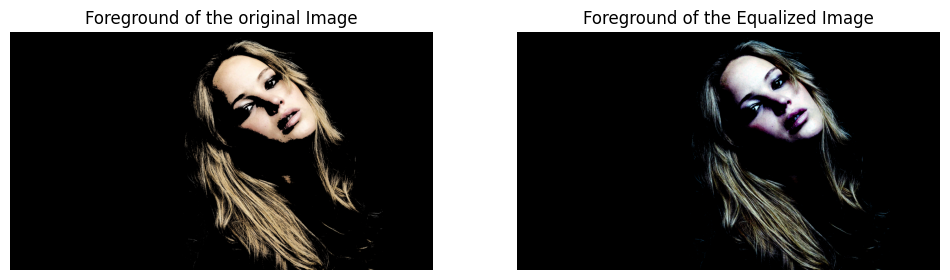

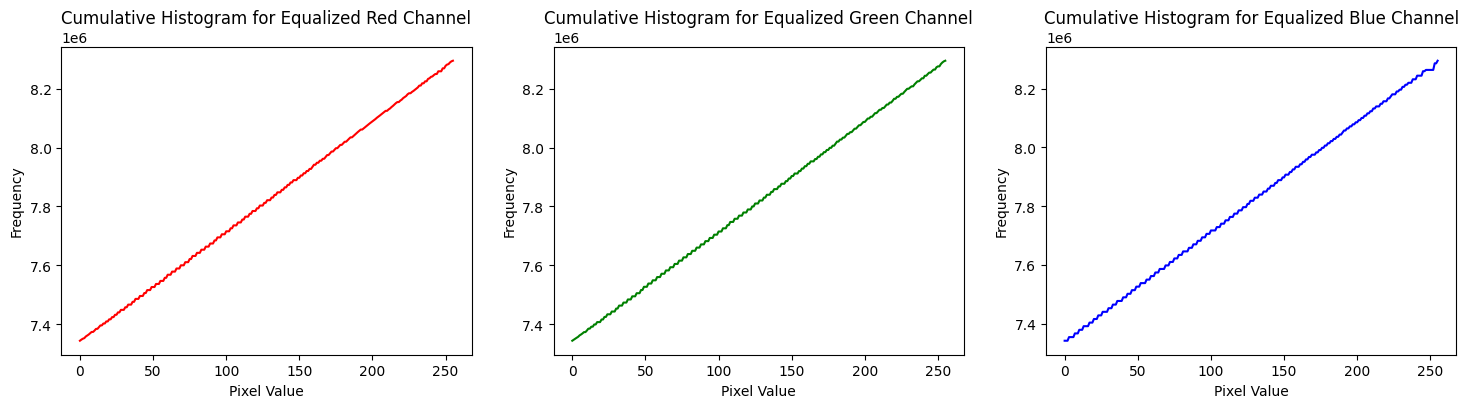

In [22]:
# Histogram equalization for three color channels
r_equalized = cv.equalizeHist(foreground_img[:, :, 0])
g_equalized = cv.equalizeHist(foreground_img[:, :, 1])
b_equalized = cv.equalizeHist(foreground_img[:, :, 2])

# Merge the equalized channels
equalized_img = cv.merge((r_equalized, g_equalized, b_equalized))

# Calculate the histograms for channels
r_equalized_hist = cv.calcHist([equalized_img], [0], None, [256], [0, 256])
g_equalized_hist = cv.calcHist([equalized_img], [1], None, [256], [0, 256])
b_equalized_hist = cv.calcHist([equalized_img], [2], None, [256], [0, 256])

# Calculate the CDF for equalized channels
r_cumulative = np.cumsum(r_equalized_hist)
g_cumulative = np.cumsum(g_equalized_hist)
b_cumulative = np.cumsum(b_equalized_hist)

#region
plt.figure(figsize=(12, 8))

plt.subplot(121)
plt.imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
plt.title('Foreground of the original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
plt.title('Foreground of the Equalized Image')
plt.axis('off')

plt.show()

plt.figure(figsize=(18, 4))

plt.subplot(131)
plt.plot(r_cumulative, color='red')
plt.title('Cumulative Histogram for Equalized Red Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.plot(g_cumulative, color='green')
plt.title('Cumulative Histogram for Equalized Green Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.plot(b_cumulative, color='blue')
plt.title('Cumulative Histogram for Equalized Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()
#endregion

### f) Add the original background with histogram equalized foreground

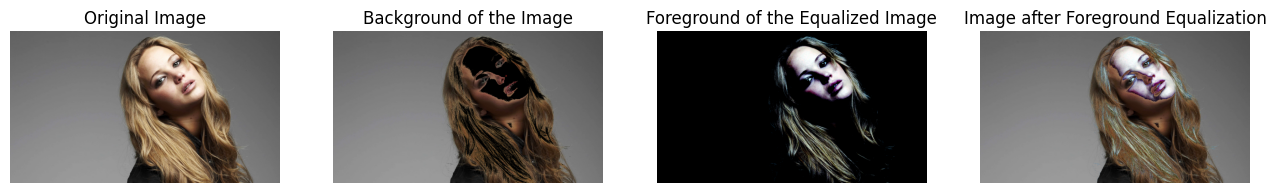

In [23]:
# Extract the background by bitwise_not
background = cv.bitwise_and(img_orig, img_orig, mask=cv.bitwise_not(foreground_mask3))

final_modified_img = cv.add(background, equalized_img)
final_modified_img_rgb = cv.cvtColor(final_modified_img, cv.COLOR_BGR2RGB)

#region
plt.figure(figsize=(16, 4))

plt.subplot(141)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(142)
plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
plt.title("Background of the Image")
plt.axis('off')

plt.subplot(143)
plt.imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
plt.title('Foreground of the Equalized Image')
plt.axis('off')

plt.subplot(144)
plt.imshow(final_modified_img_rgb)
plt.title("Image after Foreground Equalization")
plt.axis('off')

plt.show()
#endregion

## 7. Sobel Filtering 

### a) Using the Existing Filter2D Function

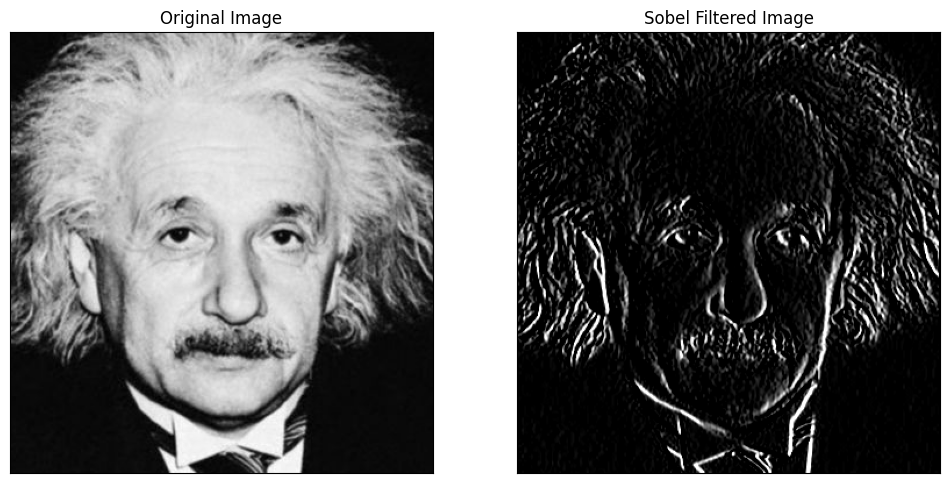

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

kernel = np.array([(1, 0, -1), (2, 0, -2), (1, 0, -1)], dtype='float')
img_filt = cv.filter2D(img, -1, kernel)

fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,12))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(img_filt, cmap='gray')
ax[1].set_title('Sobel Filtered Image')
ax[1].set_xticks([]), ax[0].set_yticks([])

plt.show()

### b) Using a Custom Code to Sobel Filter the Image

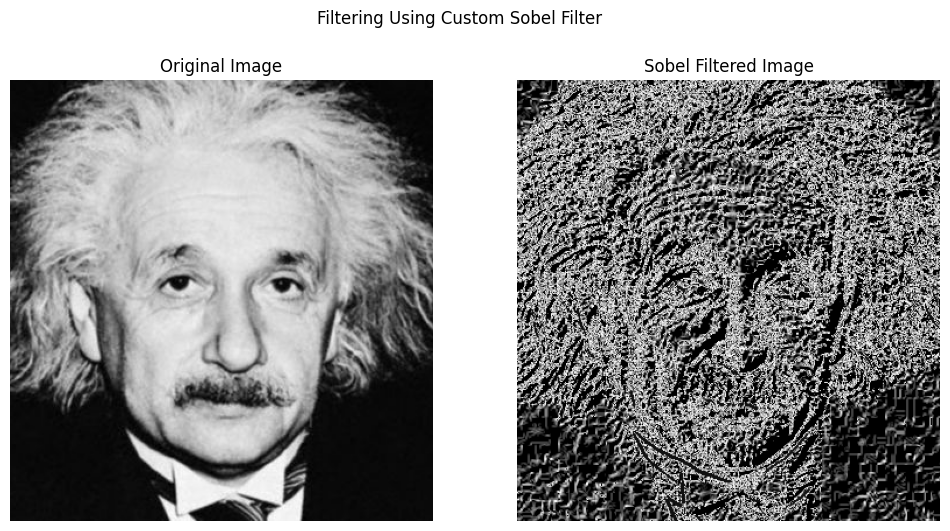

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

def sobel_filter(image, kernel):
    # Sobel filtering image using convolution
    img_height, img_width = image.shape
    
    kernel_size = kernel.shape[0]
    
    output_img = np.zeros((img_height - kernel_size + 1, img_width - kernel_size + 1))
    
    for i in range(output_img.shape[0]):
        for j in range(output_img.shape[1]):
            region = image[i : i + kernel_size, j : j + kernel_size]
            conv_result = np.sum(region * kernel)
            output_img[i, j] = conv_result
            #region
            # Apply pixel value matching 
            if output_img[i, j] < 0:       
                output_img[i, j] = 0
            elif output_img[i, j] > 255:   
                output_img[i, j] = 255
            #endregion
    return output_img.astype(np.uint8)

img_orig = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)
# Introducing the kernels which will be convoluted with the image.
x_kernel = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
y_kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')

# Introduce sobel kernels for horizontal and vertical directions
sobel_x = sobel_filter(img_orig, x_kernel)
sobel_y = sobel_filter(img_orig, y_kernel)

# Calculate the magnitude of the gradient
gradient_mag = np.sqrt(sobel_x**2 + sobel_y**2)

#region
plt.figure(figsize=(12,6))
plt.suptitle('Filtering Using Custom Sobel Filter')

plt.subplot(121)
plt.imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(gradient_mag, cmap='gray')
plt.title('Sobel Filtered Image')
plt.axis('off')

plt.show()
#endregion


### c) Using the Associative Property of Convolution

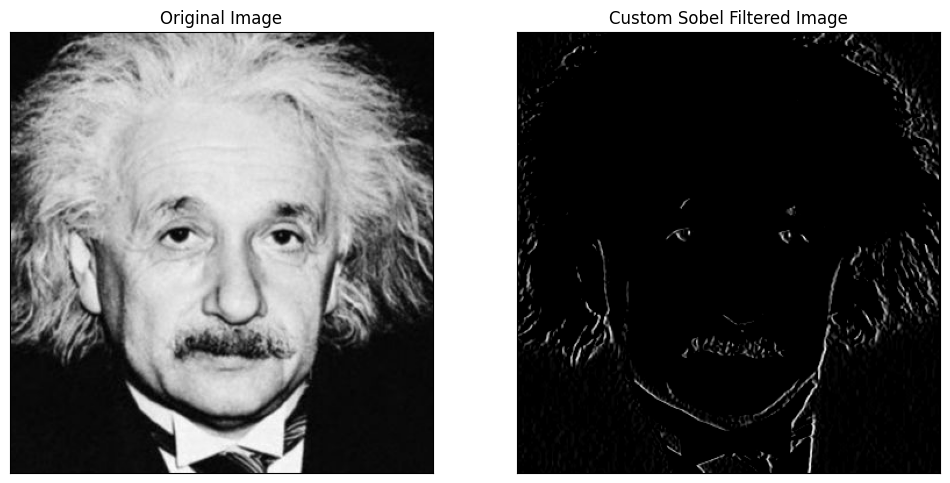

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

column_kernel = np.array([(1), (2), (1)], dtype='float')   
row_kernel = np.array([(1, 0, -1)], dtype='float')

conv_1 = cv.filter2D(img, -1, column_kernel)    # First Convolute with the column vector
conv_2 = cv.filter2D(conv_1, -1, row_kernel)    # Convolute the above result with the row vector

#region
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(12,12))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(conv_2, cmap='gray')
axes[1].set_title('Custom Sobel Filtered Image')
axes[1].set_xticks([]), axes[1].set_yticks([])

plt.show()
#endregion

### Final Sobel Filtered Images

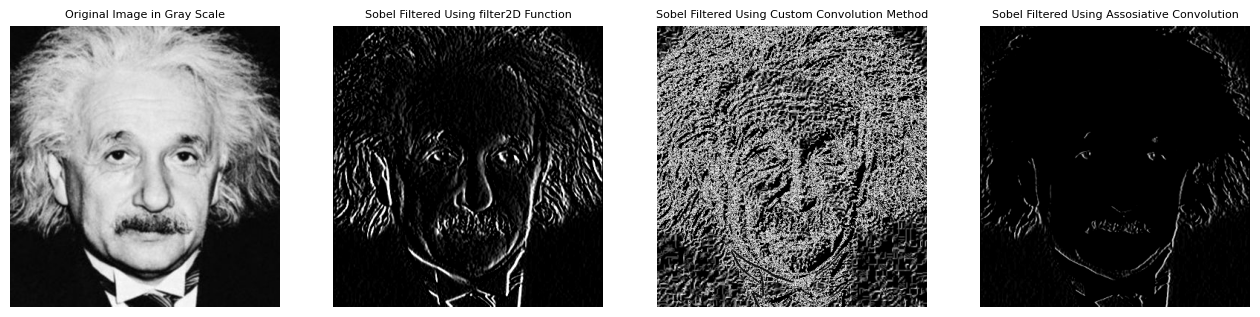

In [27]:

plt.figure(figsize=(16,4))

plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.title('Original Image in Gray Scale', fontsize=8)
plt.axis('off')

plt.subplot(142)
plt.imshow(img_filt, cmap='gray')
plt.title('Sobel Filtered Using filter2D Function', fontsize=8)
plt.axis('off')

plt.subplot(143)
plt.imshow(gradient_mag, cmap='gray')
plt.title('Sobel Filtered Using Custom Convolution Method', fontsize=8)
plt.axis('off')

plt.subplot(144)
plt.imshow(conv_2, cmap='gray')
plt.title('Sobel Filtered Using Assosiative Convolution', fontsize=8)
plt.axis('off')

plt.show()

## 8. Zooming Images

### a) Zooming by Nearest-Neighbour Method

Zooming factor:  4
Shape of original image:  (365, 600, 3)
Shape of the zoomed image:  (1459, 2400, 3)


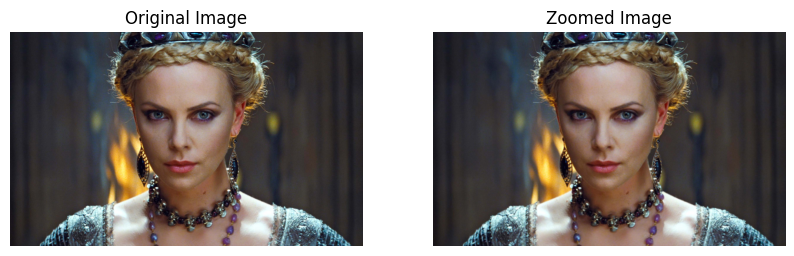

SSD value between original and zoomed images:  180381523


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_orig = cv.imread('a1images/im03small.png', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

def ssd(img1, img2):
    # Calculate the sum of squared difference
    return np.sum((img1 - img2)**2)

def zooming(original_image, zoom_factor):
    height, width, channels = original_image.shape
    
    # Apply zooming factor and prepare the shape of the zoomed image
    zoomed_height = int(height*zoom_factor) - 1
    zoomed_width = int(width*zoom_factor)
    zoomed_image = np.zeros((zoomed_height, zoomed_width, channels), dtype=np.uint8)
    
    for i in range(zoomed_height):
        for j in range(zoomed_width):
            # Zooming operation pixelwise implementation
            zoomed_image[i, j] = original_image[int(i/zoom_factor), int(j/zoom_factor)]
            
    print("Shape of original image: ", original_image.shape)
    print("Shape of the zoomed image: ", zoomed_image.shape)
    
    zoomed_image_rgb = cv.cvtColor(zoomed_image, cv.COLOR_BGR2RGB)
    
    #region
    plt.figure(figsize=(10,6))
    
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(zoomed_image_rgb)
    plt.title('Zoomed Image')
    plt.axis('off')
    
    plt.show()
    #endregion
    
    cv.imwrite('im03small.png' + 'nearest_neighbour_zooming.png', zoomed_image)         # Write zoomed image into a new file
    
    img_BIG = cv.imread('a1images/im03.png', cv.IMREAD_COLOR)
    print("SSD value between original and zoomed images: ", ssd(img_BIG, zoomed_image)) # Calculate the SSD value between zoomed image and the original image
    
    
    
zoom_factor = 4
print("Zooming factor: ", zoom_factor)
zooming(img_orig, zoom_factor)

### b) Zooming by Bilinear Interpolation

Zooming Factor:  4
Shape of original image:  (300, 480, 3)
Shape of the zoomed image:  (1200, 1920, 3)


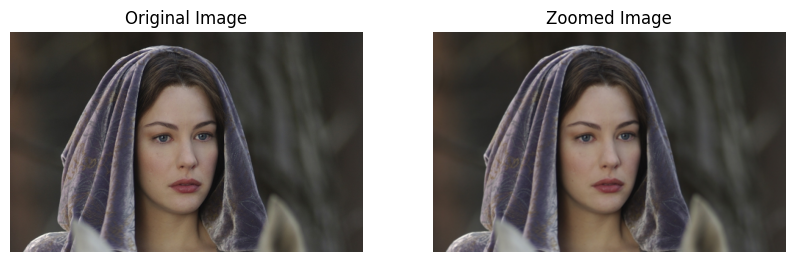

SSD value between original and zoomed images:  112055800


True

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_orig = cv.imread('a1images/im02small.png', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

def ssd(img1, img2):
    return np.sum((img1 - img2)**2)

def zooming(original_image, zoom_factor):
    # Zooming by bilinear interpolation method
    height, width, channels = original_image.shape
    zoomed_height = int(height*zoom_factor)
    zoomed_width = int(width*zoom_factor)
    zoomed_image = np.zeros((zoomed_height, zoomed_width, channels), dtype=np.uint8)
    
    y_scale = height / zoomed_height
    x_scale = width / zoomed_width
    
    for i in range(zoomed_height):
        for j in range(zoomed_width):
            original_y = i * y_scale
            original_x = j * x_scale
            
            # Calculate the four nearest neighbours
            x1, y1 = int(original_x), int(original_y)
            x2, y2 = x1 + 1, y1 + 1
            
            # check boundaries
            if x2 >= width: x2 = width - 1
            if y2 >= height: y2 = height - 1
            
            # Interpolation weights
            weight_x = original_x - x1
            weight_y = original_y - y1
            
            # Apply bilinear interpolation
            pixel_interpolated = ((1 - weight_x) * (1 - weight_y) * original_image[y1, x1] +  weight_x * (1 - weight_y) * original_image[y1, x2] + 
                                  (1 - weight_x) * weight_y * original_image[y2, x1] +  weight_x * weight_y * original_image[y2, x2])
            
            # Set the pixel value in zoomed image
            zoomed_image[i, j] = pixel_interpolated
            
    print("Shape of original image: ", original_image.shape)
    print("Shape of the zoomed image: ", zoomed_image.shape)
    
    zoomed_image_rgb = cv.cvtColor(zoomed_image, cv.COLOR_BGR2RGB)
    
    #region
    plt.figure(figsize=(10,6))
    
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(zoomed_image_rgb)
    plt.title('Zoomed Image')
    plt.axis('off')
    
    plt.show()
    #endregion
    
    
    img_BIG = cv.imread('a1images/im02.png', cv.IMREAD_COLOR)
    print("SSD value between original and zoomed images: ", ssd(img_BIG, zoomed_image))
    
    return zoomed_image

zoom_factor = 4
print('Zooming Factor: ', zoom_factor)
zoomed_image = zooming(img_orig, zoom_factor)
cv.imwrite('im02small.png' + 'zoomed_by_bilinear_interpolation.png', zoomed_image)

## 9. Segmentation of an Image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_orig = cv.imread('a1images/daisy.jpg', cv.IMREAD_COLOR)

# Create a mask and foreground, background models to initialize GrabCut algorithm
mask = np.zeros(img_orig.shape[:2], np.uint8)
foreground_model = np.zeros((1, 65), np.float64)
background_model = np.zeros((1, 65), np.float64)

rect = (50, 50, img_orig.shape[1] - 50, img_orig.shape[0] - 50)                                 # Define rectangles around the foreground

cv.grabCut(img_orig, mask, rect, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)   # Apply Grabcut algorithm

new_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')                            # Modify the mask

# Extract the foreground and background images
foreground_img = img_orig * new_mask[:, :, np.newaxis]
background_img = img_orig * (1 - new_mask[:, :, np.newaxis])

background_blurred_img = cv.GaussianBlur(background_img, (21, 21), 0)                           # Apply Gaussian blur to the background

enhanced_img = foreground_img + background_blurred_img                                          # Combine blurred and original images together

# Display final results
#region
plt.figure(figsize=(20, 4))

plt.subplot(161)
plt.imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')


plt.subplot(162)
plt.imshow(new_mask, cmap='gray')
plt.title('Segmantation Mask')
plt.axis('off')


plt.subplot(163)
plt.imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
plt.title('Foreground Image')
plt.axis('off')


plt.subplot(164)
plt.imshow(cv.cvtColor(background_img, cv.COLOR_BGR2RGB))
plt.title('Background Image')
plt.axis('off')

#endregion

# Display the enhanced image
#region

plt.subplot(165)
plt.imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(166)
plt.imshow(cv.cvtColor(enhanced_img, cv.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.axis('off')

plt.show()
#endregion


AttributeError: 'NoneType' object has no attribute 'shape'